In [159]:
# Decision For a Mobile Phone Based on criteria

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pyDecision.algorithm import promethee_i, promethee_ii, promethee_gaia, electre_i
from pyDecision.algorithm import topsis_method
import scipy.stats as ss

## Now we import the dataset and take a look at it.

In [160]:
df = pd.read_csv('datasets/mobile_phone_price.csv')
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


## Handle missing data if exists

In [162]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [163]:
df.shape

(407, 8)

In [164]:
df.describe(include='all') 

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
count,407,407,407,407,407,407,407.000000,407
unique,16,239,13,20,41,143,NaN,89
top,Samsung,Poco X3 Pro,128GB,4GB,6.5,13MP + 2MP + 2MP,NaN,$149
freq,79,6,125,68,108,29,NaN,18
mean,NaN,NaN,NaN,NaN,NaN,NaN,4676.476658,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,797.193713,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1821.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,4300.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000,NaN


# Clean up data

In [165]:
# Cleaning the price from strings
df['Price ($)'] = df['Price ($)'].astype("str").str.replace('$', '').str.replace(',', '').str.strip()
df['Price ($)'] = pd.to_numeric(df['Price ($)'])
df['Price ($)'].unique()

array([ 999, 1199,  899,  279,  799,  249,  699,  329,  449,  199,  299,
        379,  179,  729,  599,  139,  189,  399,  259,  159,  229,  499,
        129,  529,  369, 1099,  169,   99,  459,  239, 1299,  429,  659,
        269,  359,  549,  319,  349,  969,  149,  219,  109,  389,  309,
        849,  469,  209,  119,  339,  289,  130,  749,  649,  419, 1399,
       1999, 1049])

In [166]:
# Cleaning the Storage from strings
df['Storage'] = df['Storage'].astype("str").str.replace('GB', '').str.strip()
df['Storage'] = pd.to_numeric(df['Storage'])
df['Storage'].unique()

array([128, 256,  64,  32, 512])

In [167]:
# Cleaning the RAM from strings
df['RAM'] = df['RAM'].astype("str").str.replace('GB', '').str.strip()
df['RAM'] = pd.to_numeric(df['RAM'])
df['RAM'].unique()

array([ 6, 12,  8,  4,  3,  2,  5, 16])

In [168]:
# Cleaning the camera from the sum of all cameras 
import re

def calculate_total_mp(camera_string):
    # Extract numbers from the string and sum them up
    numbers = re.findall(r'\d+\.?\d*', camera_string)
    return sum(map(float, numbers))

df['Camera (MP)'] = df['Camera (MP)'].astype("str").apply(calculate_total_mp)
df['Camera (MP)'].unique()

array([ 36. , 140. , 108. ,  79. ,  62.2,  24. ,  60. ,  81. , 118. ,
        74. ,  86. , 116. ,  77. ,  88. ,  54. ,  52. ,  62. ,  53. ,
       100. , 123. ,  17. ,  15. ,  12. ,  55. ,  76. ,  61. ,  72. ,
        57. ,  89. ,  66. , 132. ,  84. ,  18. ,  73. , 106. , 146. ,
        10. ,  32. ,  82. ,  25. ,  58. ,  50. , 120. ,  13. ,  63. ,
        20. ,   8. ,  22. ,  28. ,  16. ,  23. ,  38. ,  28.2,  85. ,
        80. , 126. ,  71. ,  19. , 105. ,  65. , 109. ,  91. ,  68. ,
        29. ,  34. , 171. ,  75. , 168.3])

In [169]:
# Cleaning the screen size from the sum of all screen sizes 
import re

def get_first_mp(size_string):
    # Extract numbers from the string and multiply them up
    return re.findall(r'\d+\.?\d*', size_string)[0]

df['Screen Size (inches)'] = df['Screen Size (inches)'].astype("str").apply(calculate_total_mp)
df['Screen Size (inches)'].unique()

array([ 6.1 ,  6.8 ,  6.7 ,  6.67,  6.4 ,  6.55,  6.78,  6.43,  6.5 ,
        6.62,  5.4 ,  6.2 ,  6.51,  6.6 ,  4.7 ,  6.58,  6.52,  6.44,
        6.53,  6.56, 10.7 ,  4.5 ,  6.39,  5.9 ,  5.5 ,  6.81,  5.99,
        6.82,  6.3 ,  6.22,  6.  ,  6.35,  6.9 ,  6.76,  6.49,  6.72,
        5.7 ,  6.47,  7.6 ,  6.15,  6.57])

## Now we set the criterias and their weights for the decision

In [170]:
criteria = ["Price ($)", "Storage", "RAM", "Camera (MP)", "Battery Capacity (mAh)", "Screen Size (inches)"]
weights = [0.3, 0.1, 0.2, 0.1, 0.2, 0.1]
Q = [0.1] * len(criteria)  # Example values, adjust as needed
S = [0.2] * len(criteria)  # Example values, adjust as needed
P = [0.3] * len(criteria)  # Example values, adjust as needed
F = [0] * len(criteria)  # Example values, adjust as needed
criterion_type = ['min', 'max', 'max', 'max', 'max', 'max']

## Normalize the data

In [171]:
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df[criteria]), columns=criteria)
print(normalized_df.head())

   Price ($)   Storage       RAM  Camera (MP)  Battery Capacity (mAh)  \
0   0.473684  0.200000  0.285714     0.171779                0.245993   
1   0.578947  0.466667  0.714286     0.809816                0.613825   
2   0.421053  0.200000  0.428571     0.613497                0.517281   
3   0.094737  0.200000  0.285714     0.435583                0.617687   
4   0.368421  0.200000  0.428571     0.332515                0.539293   

   Screen Size (inches)  
0              0.258065  
1              0.370968  
2              0.354839  
3              0.350000  
4              0.306452  


## Calculate the score and ranking for each algorithm



In [172]:
# Apply PROMETHEE I
promethee_i_results = promethee_i(normalized_df.values, weights, Q, S, P, F)
print(promethee_i_results)

[['-' '-' '-' ... '-' '-' '-']
 ['P+' '-' 'P+' ... 'P+' 'P+' 'P+']
 ['P+' '-' '-' ... 'P+' 'P+' 'P+']
 ...
 ['P+' '-' '-' ... '-' 'P+' 'P+']
 ['P+' '-' '-' ... '-' '-' '-']
 ['P+' '-' '-' ... '-' 'P+' '-']]


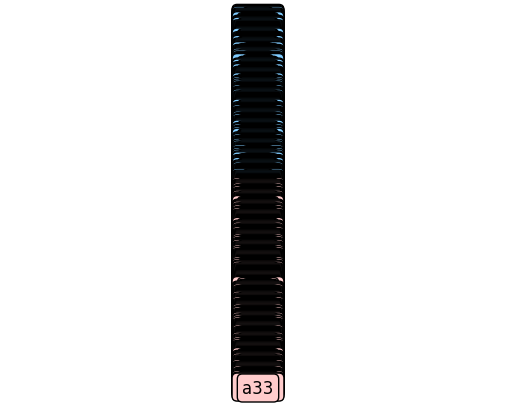

[368, 374, 105, 2, 310, 149, 289, 393, 362, 10, 15, 84, 324, 314, 104, 89, 86, 312, 113, 293, 172, 367, 116, 331, 313, 352, 304, 76, 85, 90, 377, 376, 336, 364, 299, 58, 88, 326, 209, 124, 403, 343, 3, 61, 298, 335, 375, 243, 322, 24, 372, 5, 259, 345, 394, 9, 7, 79, 17, 388, 206, 81, 97, 131, 230, 163, 60, 52, 225, 302, 405, 297, 354, 139, 103, 181, 45, 94, 296, 387, 93, 205, 92, 342, 13, 122, 228, 168, 190, 31, 407, 323, 159, 311, 25, 158, 396, 186, 295, 207, 150, 339, 223, 363, 328, 65, 64, 292, 333, 391, 133, 87, 169, 118, 267, 378, 109, 344, 44, 254, 126, 83, 100, 233, 250, 208, 144, 211, 80, 38, 178, 148, 35, 195, 245, 55, 135, 96, 21, 66, 399, 134, 231, 12, 361, 303, 187, 355, 59, 198, 23, 321, 232, 358, 406, 1, 330, 235, 82, 182, 20, 191, 170, 4, 67, 114, 214, 373, 130, 95, 47, 161, 171, 137, 73, 202, 385, 392, 347, 179, 291, 8, 175, 332, 247, 351, 287, 258, 353, 127, 165, 68, 341, 173, 224, 242, 185, 28, 196, 166, 19, 256, 359, 236, 390, 57, 273, 369, 143, 203, 146, 74, 51, 11

In [173]:
# Apply PROMETHEE II
results = promethee_ii(normalized_df.values, weights, Q, S, P, F, sort = True, graph = True, verbose = True)
# Get only the first cell of each sub array in results
promethee_ii_results = [int(sub_array[0]) for sub_array in results]
print(promethee_ii_results)

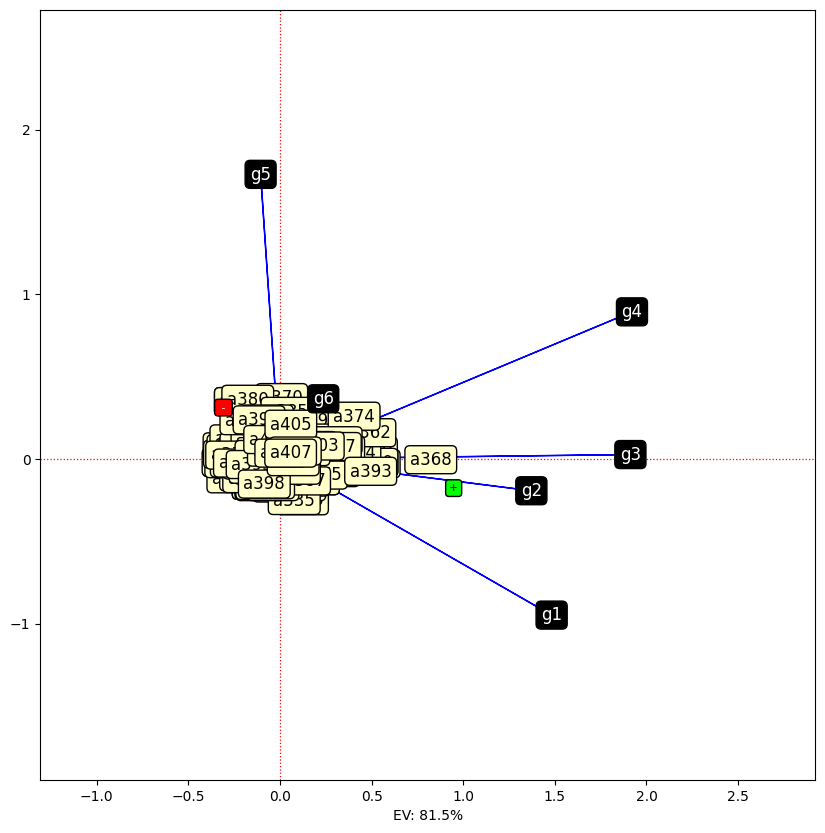

None


In [174]:
# Apply PROMETHEE Gaia
promethee_gaia_results = promethee_gaia(normalized_df.values, weights, Q, S, P, F)
print(promethee_gaia_results)

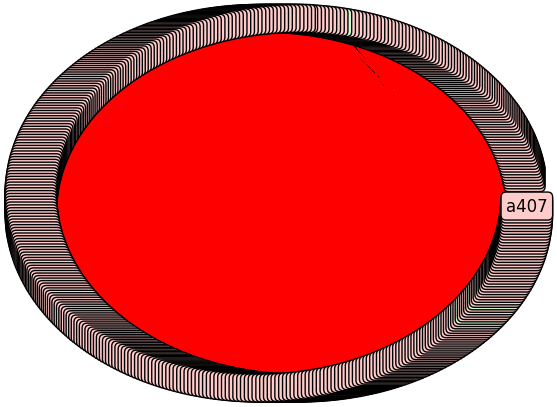

(array([[1. , 0. , 0.4, ..., 0.4, 0.4, 0.6],
       [1. , 1. , 1. , ..., 1. , 1. , 1. ],
       [0.7, 0. , 1. , ..., 0.7, 1. , 1. ],
       ...,
       [1. , 0. , 0.5, ..., 1. , 0.5, 0.7],
       [0.7, 0. , 0.3, ..., 0.6, 1. , 0.4],
       [0.7, 0. , 0.4, ..., 0.7, 0.7, 1. ]]), array([[0.        , 0.63803681, 0.44171779, ..., 0.11430778, 0.21472393,
        0.27128789],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05263158, 0.28571429, 0.        , ..., 0.10526316, 0.        ,
        0.        ],
       ...,
       [0.        , 0.63803681, 0.44171779, ..., 0.        , 0.21472393,
        0.17791411],
       [0.3       , 0.42331288, 0.24736842, ..., 0.35263158, 0.        ,
        0.11578947],
       [0.18421053, 0.4601227 , 0.26380368, ..., 0.23684211, 0.14285714,
        0.        ]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 0., 0

In [175]:

# Apply ELECTRE I
electre_i_results = electre_i(normalized_df.values, weights)
print(electre_i_results)

a1: 0.44
a2: 0.49
a3: 0.52
a4: 0.66
a5: 0.54
a6: 0.48
a7: 0.48
a8: 0.66
a9: 0.58
a10: 0.48
a11: 0.64
a12: 0.62
a13: 0.67
a14: 0.5
a15: 0.48
a16: 0.64
a17: 0.54
a18: 0.67
a19: 0.65
a20: 0.65
a21: 0.68
a22: 0.63
a23: 0.67
a24: 0.57
a25: 0.67
a26: 0.53
a27: 0.62
a28: 0.65
a29: 0.62
a30: 0.65
a31: 0.63
a32: 0.65
a33: 0.55
a34: 0.65
a35: 0.68
a36: 0.65
a37: 0.66
a38: 0.65
a39: 0.63
a40: 0.55
a41: 0.62
a42: 0.64
a43: 0.64
a44: 0.65
a45: 0.62
a46: 0.5
a47: 0.65
a48: 0.64
a49: 0.65
a50: 0.63
a51: 0.65
a52: 0.41
a53: 0.63
a54: 0.62
a55: 0.62
a56: 0.63
a57: 0.65
a58: 0.36
a59: 0.68
a60: 0.66
a61: 0.63
a62: 0.63
a63: 0.55
a64: 0.68
a65: 0.69
a66: 0.62
a67: 0.66
a68: 0.67
a69: 0.55
a70: 0.65
a71: 0.65
a72: 0.64
a73: 0.66
a74: 0.64
a75: 0.54
a76: 0.6
a77: 0.64
a78: 0.48
a79: 0.54
a80: 0.65
a81: 0.57
a82: 0.65
a83: 0.65
a84: 0.55
a85: 0.64
a86: 0.65
a87: 0.6
a88: 0.37
a89: 0.52
a90: 0.54
a91: 0.57
a92: 0.63
a93: 0.66
a94: 0.69
a95: 0.66
a96: 0.68
a97: 0.67
a98: 0.62
a99: 0.64
a100: 0.55
a101: 0.52
a

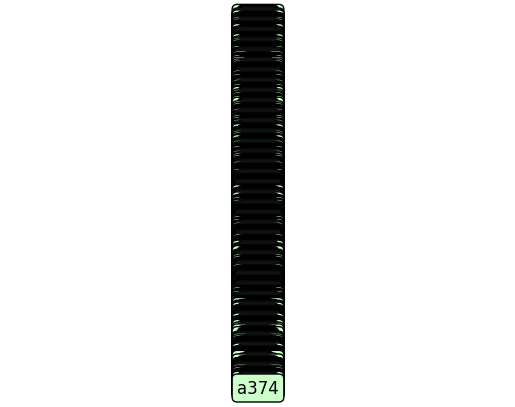

[397 380 363  59 353 383 386  50 324 387 142 258  24 374 388 144 355  38
 107  89  17 208  34 328  35 359 269 108 276  98 236 125 339 116  15 128
  57 105 200 350 254 174 157  92 268 375  83 146 140 216  93 400 209 267
 278 213  99 406   4  78 241 201 340   8   2 259  74  40 348 132 134 165
  47 182 354 312 151 384 356 106 325 123  95 349 162 104 316 405 365 358
 330 234  61   3  63   9  23 287 167 344 364 322 393 338 379 280 277 249
 345 292  39 212 376 310 311 308 220  28 244 138 194  46 219 362  76  32
 221 166 215  65   6 191 317 260  18 239 255 178  64 253 149 284 112  12
 283  91 257  88 381  19 153 282 195  62 155 169 133  10  16 161  84 163
 274 186  41 109 243 237 246  60 256 321  81 211  51 118 199 289  48 136
  44 150 145 271 110  30  96 103 229 238 119 180 183  45   1 111 247   5
 139 168 156  70 113 172  29  31  69  13  37  77  22 129 170  87 192 242
 295 294 187 206  79 285 137  82 126 297 290  25 185   7 261 120  21 159
 275 100 147  86  42 184 250  97  72  90  27 188  5

In [176]:

# Apply TOPSIS
results = topsis_method(normalized_df.values, weights, criterion_type)
topsis_results = ss.rankdata(-results, method='ordinal')
print(topsis_results)

In [177]:
# Combine results with the original data
# df['PROMETHEE I Rank'] = promethee_i_results
df['PROMETHEE II Rank'] = promethee_ii_results
# df['PROMETHEE Gaia Rank'] = promethee_gaia_results['Phi']  # Assuming 'Phi' is the main Rank
# df['ELECTRE I Rank'] = electre_i_results
df['TOPSIS Rank'] = topsis_results

In [184]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),PROMETHEE II Rank,TOPSIS Rank
0,Apple,iPhone 13 Pro,128,6,6.10,36.0,3095,999,368,397
1,Samsung,Galaxy S21 Ultra,256,12,6.80,140.0,5000,1199,374,380
2,OnePlus,9 Pro,128,8,6.70,108.0,4500,899,105,363
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,79.0,5020,279,2,59
4,Google,Pixel 6,128,8,6.40,62.2,4614,799,310,353


In [186]:
# Show the brand and model with the better rank promethee II
df.sort_values(by=['PROMETHEE II Rank'])[['Brand', 'Model', 'PROMETHEE II Rank']].head(10)

,Brand,Model,PROMETHEE II Rank
155,Motorola,Moto G Power 2022,1
3,Xiaomi,Redmi Note 10 Pro,2
42,Samsung,Galaxy F22,3
163,Samsung,Galaxy A21s,4
51,Apple,iPhone 11 Pro Max,5
301,Huawei,Nova 8 Pro 5G,6
56,Xiaomi,Redmi 9T,7
181,Samsung,Galaxy M32,8
55,Oppo,A54,9
9,Vivo,X70 Pro+,10


In [187]:
# Show the brand and model with the better rank topsis
df.sort_values(by=['TOPSIS Rank'])[['Brand', 'Model', 'TOPSIS Rank']].head(10)

,Brand,Model,TOPSIS Rank
194,Realme,7i,1
64,Realme,7i,2
93,Realme,Narzo 50 Pro 5G,3
58,Vivo,Y33,4
197,Vivo,Y33s,5
130,Xiaomi,Redmi Note 10 Pro Max,6
229,Xiaomi,Redmi Note 10 Pro Max,7
63,Vivo,Y53s,8
95,Vivo,Y33s,9
157,Xiaomi,Poco X3 GT,10
